# Projekt 3

Analiza tweetów o wybranej tematyce

### Jan Kieżun
---

Temat: Analiza tweetów związanych z teorią płaskiej ziemii

---

### 1. Wstęp

Ten notebook to krótka analiza tweetów o temacie płaskiej ziemii. Na przestrzeni czasu będzie zaobserwować jakie emocje były wyrażone przez autorów wpisów oraz jaki mieli sentyment.

Poniżej importy:

In [94]:
import pandas as pd
from snscrape.modules import twitter
import sys

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

import matplotlib.pyplot as plt
import text2emotion as te

from wordcloud import WordCloud

from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

### 2. Ładowanie danych

Za pomocą paczki snscrape zostało pobranych około 500 tweetów z każdej miesiąca w latach 2020-2022. Wpisy są w języku angielskim. Te tweety, w których nie został użyty tag #flatearth lub nie mają tego wyrażenia w sobie, zostały wybrane na podstawie algorytmu tweetera.

In [95]:
def loading_bar(i, n):
    if (i % (n//10) == 0):
        sys.stdout.write('Done: ' + str(i) + '/' + str(n) + '\r')
        sys.stdout.flush()

tweets = {i:[] for i in range(1,13)}
num_of_tweets_per_month = 500

for k in range(2020,2023):
    for i in range(1,13):
        curr_tweets = []
        month = str(i).zfill(2)
        year = str(k)
        scraper = twitter.TwitterSearchScraper(
            query='#flatearth lang:en since:'+year+'-'+month+'-01 until:'+year+'-'+month+'-28')
        for j,tweet in enumerate(scraper.get_items()):
            tweet_data={
                'id':tweet.id,
                'date':tweet.date,
                'content':tweet.rawContent,
            }
            curr_tweets.append(tweet_data)
            df = pd.DataFrame(curr_tweets)
            df.to_csv('data/tweets_'+str(year)+'_'+month+'.csv')
            if (j>num_of_tweets_per_month):
                break
        tweets[i].extend(curr_tweets)
        
        loading_bar(i+(k-2020)*12, 36)
    
    

Twitter responded with an error: BadRequestError: BadRequest: Failed to get part of the tweet


Unavailable user in card on tweet 1365493472669683713
User 1307892224475033600 not found in user refs in card on tweet 1365493472669683713
Unavailable user in card on tweet 1365442978161061888
User 1307892224475033600 not found in user refs in card on tweet 1365442978161061888


Unavailable user in card on tweet 1475586097539387403
User 1307892224475033600 not found in user refs in card on tweet 1475586097539387403
Stopping after 20 empty pages


Stopping after 20 empty pages
Stopping after 20 empty pages


Empty user ref object in card on tweet 1530335975347736576
Empty user ref object in card on tweet 1530335975347736576
User 4503599629184530 not found in user refs in card on tweet 1530335975347736576
User 4503599629184530 not found in user refs in card on tweet 1530335975347736576
Unavailable user in card on tweet 1541521683550392320
User 14204245 not found in user refs in card on tweet 1541521683550392320


Unavailable user in card on tweet 1552419203117944840
User 1307892224475033600 not found in user refs in card on tweet 1552419203117944840


In [96]:
# dataframes = map(lambda i: pd.DataFrame(tweets[i//3+1][]), range(36))
dataframes = []
for y in range(3):
    for m in range(12):
        dataframes.append(pd.DataFrame(tweets[m+1][(num_of_tweets_per_month+2)*y:(num_of_tweets_per_month+2)*(y+1)]))
df = pd.concat(dataframes)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16984 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   id       16984 non-null  int64              
 1   date     16984 non-null  datetime64[ns, UTC]
 2   content  16984 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 530.8+ KB


### 3. Obróbka danych

Czyszczenie i tokenizacja

In [ ]:
useless_words = stopwords.words("english") + list(string.punctuation) + [
    '’', '”', '“', '…', '—', '‘', '”', '’', '“', '”', '’', '”', '’', '”', '’',
]

def tokenize(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in useless_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

df['tokens'] = df['content'].apply(tokenize)
df['tokens'].value_counts()

df.head()

### 4. Analiza emocji

Szczęście, smutek, złość, zaskoczenie i strach.

In [98]:
def get_emotions(text):
    return te.get_emotion(text)

happy = []
sad = []
angry = []
surprise = []
fear = []
month = [i for i in range(1,37)]
df.info()

for y in range(3):
    for i in range(0,12):
        avg_happy = avg_sad = avg_angry = avg_surprise = avg_fear = 0
        for tweet in df['tokens'][(num_of_tweets_per_month+2)*(y*12+i):(num_of_tweets_per_month+2)*(y*12+i+1)]:
            emotions = get_emotions(" ".join(tweet))
            avg_happy += emotions['Happy']
            avg_sad += emotions['Sad']
            avg_angry += emotions['Angry']
            avg_surprise += emotions['Surprise']
            avg_fear += emotions['Fear']
        happy.append(avg_happy/num_of_tweets_per_month)
        sad.append(avg_sad/num_of_tweets_per_month)
        angry.append(avg_angry/num_of_tweets_per_month)
        surprise.append(avg_surprise/num_of_tweets_per_month)
        fear.append(avg_fear/num_of_tweets_per_month)

<class 'pandas.core.frame.DataFrame'>
Index: 16984 entries, 0 to 123
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   id       16984 non-null  int64              
 1   date     16984 non-null  datetime64[ns, UTC]
 2   content  16984 non-null  object             
 3   tokens   16984 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 663.4+ KB


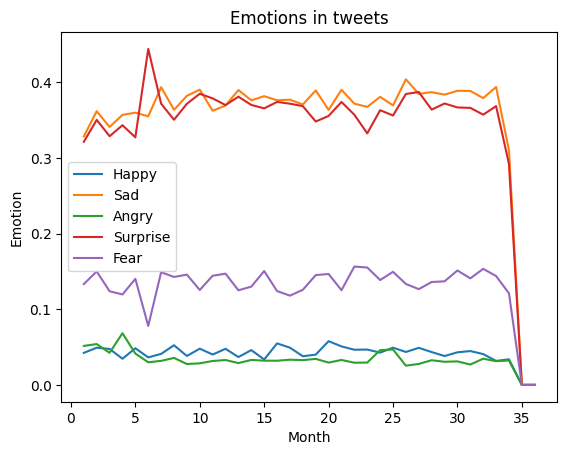

In [99]:
plt.plot(month, happy, label='Happy')
plt.plot(month, sad, label='Sad')
plt.plot(month, angry, label='Angry')
plt.plot(month, surprise, label='Surprise')
plt.plot(month, fear, label='Fear')
plt.xlabel('Month')
plt.ylabel('Emotion')
plt.title('Emotions in tweets')
plt.legend()

plt.show()

### 5. Analiza sentymentu

Dodatnia wartość to sentyment pozytywny, a ujemna to negatywny.

In [106]:
def get_sentiment(text):
    return SentimentIntensityAnalyzer().polarity_scores(text)['compound']

sentiment = [get_sentiment(" ".join(tweet)) for tweet in df['tokens']]
df['sentiment'] = sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\janki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


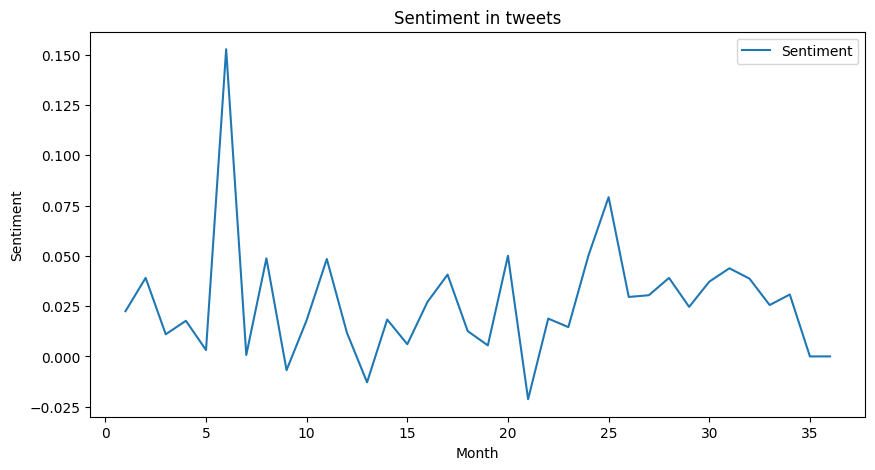

In [107]:
avg_sentiment = []
for y in range(3):
    for i in range(0,12):
        avg_sentiment.append(sum(sentiment[(num_of_tweets_per_month+2)*(y*12+i):(num_of_tweets_per_month+2)*(y*12+i+1)])/num_of_tweets_per_month)

plt.figure(figsize=(10,5))
plt.plot(month, avg_sentiment, label='Sentiment')
plt.xlabel('Month')
plt.ylabel('Sentiment')
plt.title('Sentiment in tweets')
plt.legend()

### 6. Chmura słów

Tweety były wyszukiwane po słowach "flat earth", dlatego one będą najpopularniejsze, z tego powodu zrobiłem też wykres słów bez nich.

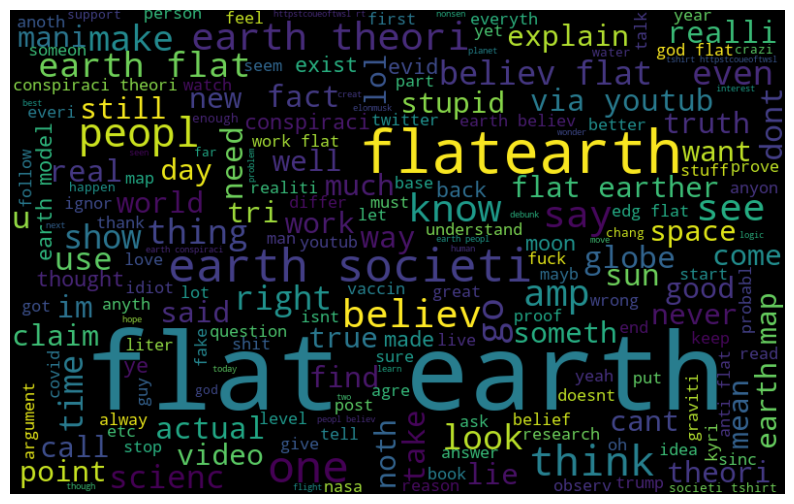

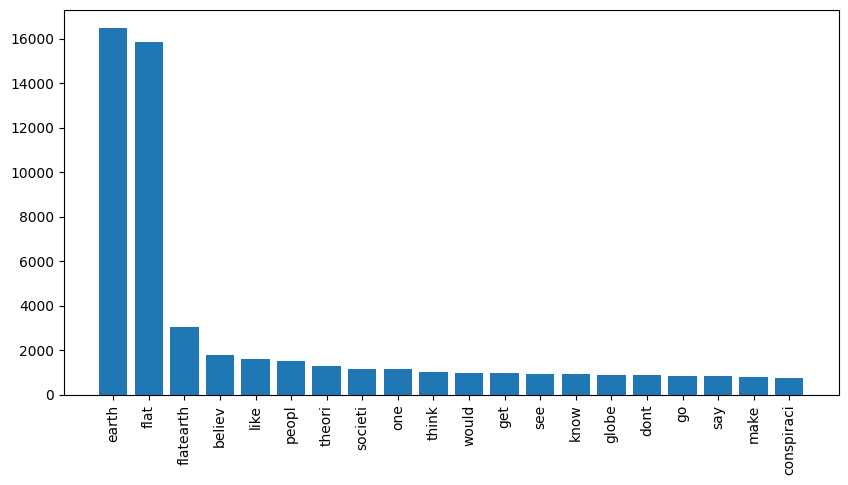

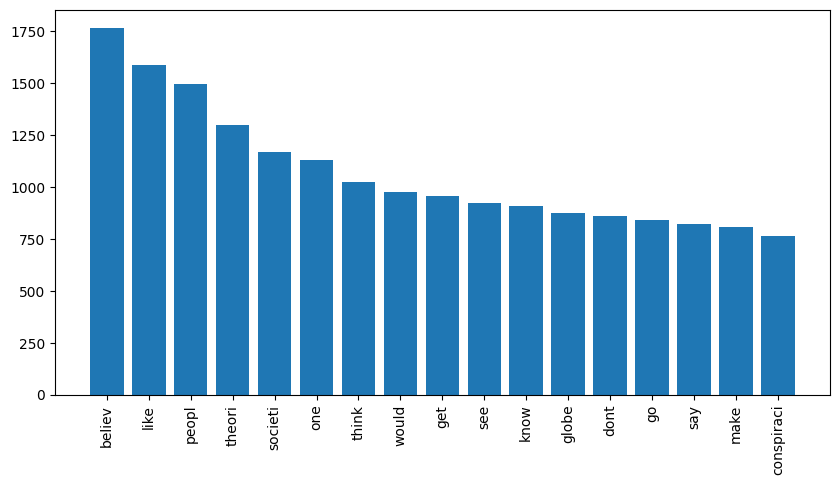

In [100]:
all_words = ' '.join([word for tokens in df['tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(1, figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

from collections import Counter

count = Counter(all_words.split())
most_common = count.most_common(20)
most_common = dict(most_common)
plt.figure(figsize=(10, 5))
plt.bar(most_common.keys(), most_common.values())
plt.xticks(rotation=90)
most_common_without_flatearth = {k: v for k, v in most_common.items() if k not in ['flat', 'earth', 'flatearth']}
plt.figure(figsize=(10, 5))
plt.bar(most_common_without_flatearth.keys(), most_common_without_flatearth.values())
plt.xticks(rotation=90)
plt.show()

### 7. Wnioski

Większość danych to są kłótnie pomiędzy użytkownikami twittera. Ludzie piszący o płaskiej ziemii rzadko wyrażają złość i szczęście, częściej smutek i zaskoczenie. O dziwo średni sentyment na miesiąc jest pozytywny pomimo napiętego charakteru dyskusji. Widoczna jest mała zmiana na wykresie w okresie 5 miesiąca (2020-06), to mogło być spowodowane protestami w tamtym okresie.